In [85]:
import sys
sys.path.append('./models/')
from Arima import ARIMA_Model
from SIR  import *
from exponential_regression import ExponentialRegression
from moving_average import MovingAverage
from Truth import Truth
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from evaluate_model import evaluate_model
import json

df = pd.read_csv('deaths_and_infections.csv')

# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))

In [86]:
models = ['SIRD', 'ExponentialRegression', 'MovingAverage', 'Arima']

In [87]:
myarima=ARIMA_Model()
mysir=SIRD_model_2()
myexp=ExponentialRegression()
mymoving=MovingAverage()
truth=Truth()
alphas=np.array([0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
indexs_points=[[30], [40], [50], [60], [70], [80], [90], [100], [110]]
reach=7
weights=np.concatenate((np.array([0.5]), alphas * 0.5))
dicoresults=dict()

if False: 
    for index_points in indexs_points:
        try: 
            perf_sir=evaluate_model(model=mysir, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except :
            perf_sir=np.inf
        try:  
            perf_exp=evaluate_model(model=myexp, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except:
            perf_exp=np.inf
        try:
            perf_moving=evaluate_model(model=mymoving, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except: 
            perf_moving=np.inf
        try:
            perf_arima=evaluate_model(model=myarima, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except:
            perf_arima=np.inf
        dicoresults[str(index_points)]=[perf_sir, perf_exp, perf_moving, perf_arima]
        
    # write results: 
    with open('comparing_models.json', 'w') as f:
        json.dump(dicoresults, f)

In [88]:
# load results: 
with open('comparing_models.json', 'r') as f:
    dicoresults = json.load(f)

In [89]:
with open('compte_rendu.txt', 'a') as myfile: 
    for point in dicoresults.keys(): 
        myfile.write('For the point: '+point+'\n')
        myfile.write('The best model is ' + models[(np.argmin(dicoresults[point]))]+'\n')
        myfile.write('   ')


In [90]:
myarima=ARIMA_Model()
mysir=SIRD_model_2()
myexp=ExponentialRegression()
mymoving=MovingAverage()
truth=Truth()
alphas=np.array([0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
indexs_points=[[30], [40], [50], [60], [70], [80], [90], [100], [110]]
reach=14
weights=np.concatenate(([0.5], alphas * 0.5))
dicoresults=dict()


if False: 
    for index_points in indexs_points:
        try: 
            perf_sir=evaluate_model(model=mysir, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except :
            perf_sir=np.inf
        try:  
            perf_exp=evaluate_model(model=myexp, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except:
            perf_exp=np.inf
        try:
            perf_moving=evaluate_model(model=mymoving, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except: 
            perf_moving=np.inf
        try:
            perf_arima=evaluate_model(model=myarima, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except:
            perf_arima=np.inf
        dicoresults[str(index_points)]=[perf_sir, perf_exp, perf_moving, perf_arima]
        
    # write results: 
    with open('comparing_models.json', 'w') as f:
        json.dump(dicoresults, f)

In [91]:
# load results: 
with open('comparing_models_14.json', 'r') as f:
    dicoresults = json.load(f)
    

In [92]:
with open('compte_rendu_14.txt', 'a') as myfile: 
    for point in dicoresults.keys(): 
        myfile.write('For the point: '+point+'\n')
        myfile.write('The best model is ' + models[(np.argmin(dicoresults[point]))]+'\n')
        myfile.write('   ')


In [93]:
import json

In [94]:
new_deaths[[5,6]]

array([0., 0.])

Text(0.5, 1.0, 'Points of evaluation and best models for a 7-days ahead prediction')

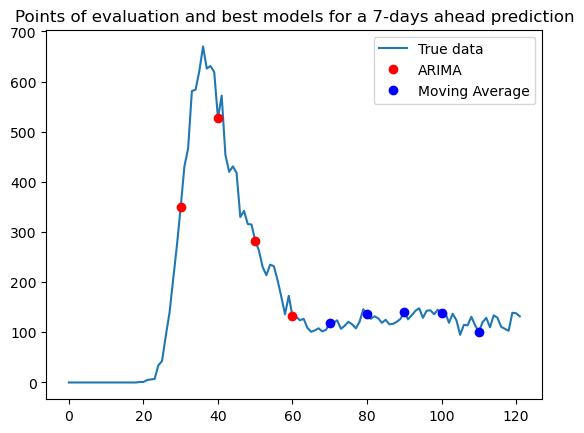

In [95]:
plt.plot(new_deaths, label='True data')
plt.plot([30, 40, 50, 60], new_deaths[[30, 40, 50, 60]], 'ro', label='ARIMA')
plt.plot( [70, 80, 90, 100, 110], new_deaths[ [70, 80,90, 100,  110]], 'bo', label= 'Moving Average')
plt.legend()
plt.title('Points of evaluation and best models for a 7-days ahead prediction')

Text(0.5, 1.0, 'Points of evaluation and best models for a 14-days ahead prediction')

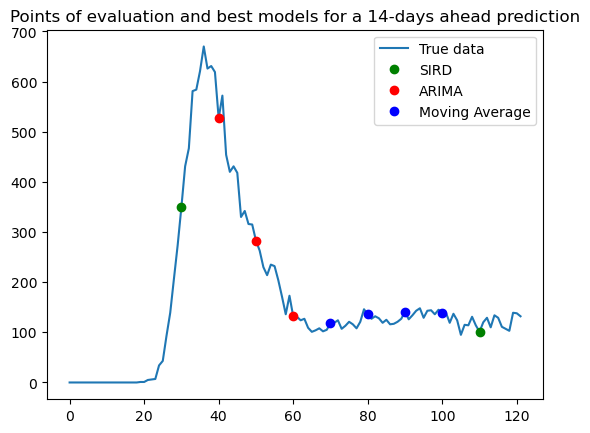

In [96]:
plt.plot(new_deaths, label='True data')
plt.plot([30, 110], new_deaths[[30,110]],'go',   label='SIRD')
plt.plot([ 40, 50, 60], new_deaths[[ 40, 50, 60]], 'ro', label='ARIMA')
plt.plot( [70, 80, 90, 100], new_deaths[ [70, 80, 90, 100]], 'bo', label= 'Moving Average')
plt.legend()
plt.title('Points of evaluation and best models for a 14-days ahead prediction')

In [97]:
# load results: 
import json
import numpy as np
import matplotlib.pyplot as plt
models1D=['SIRD', 'ExponentialRegression', 'MovingAverage', 'Arima', 'SIRD2']

with open('comparing_models_1D_reach=7.json', 'r') as f:
    dicoresults = json.load(f)
best_models_1D_7=[models1D[np.argmin(dicoresults[point])] for point in dicoresults.keys()]

with open('comparing_models_1D_reach=14.json', 'r') as f:
    dicoresults = json.load(f)
models1D=['SIRD', 'ExponentialRegression', 'MovingAverage', 'Arima', 'SIRD2']
best_models_1D_14=[models1D[np.argmin(dicoresults[point])] for point in dicoresults.keys()]

In [98]:
print(best_models_1D_14)
print(best_models_1D_7)
print(best_models_3D_14)
print(best_models_3D_7)

['Arima', 'MovingAverage', 'Arima', 'SIRD', 'SIRD', 'SIRD', 'Arima', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'SIRD']
['Arima', 'Arima', 'Arima', 'SIRD', 'Arima', 'SIRD', 'SIRD', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage']
['SIRD', 'SIRD', 'SIRD', 'SIRD', 'SIRD', 'SIRD', 'SIRD', 'SIRD', 'Arima', 'Arima', 'Arima', 'Arima', 'Arima', 'Arima', 'Arima', 'Arima', 'SIRD']
['SIRD', 'SIRD', 'SIRD', 'SIRD', 'SIRD', 'SIRD', 'SIRD', 'ExponentialRegression', 'Arima', 'Arima', 'Arima', 'Arima', 'Arima', 'ExponentialRegression', 'Arima', 'Arima', 'Arima']


In [99]:
models3D=['SIRD', 'ExponentialRegression', 'MovingAverage', 'Arima']
with open('comparing_models_3D_reach=7.json', 'r') as f:
    dicoresults = json.load(f)
best_models_3D_7=[models3D[np.argmin(dicoresults[point])] for point in dicoresults.keys()]

with open('comparing_models_3D_reach=14.json', 'r') as f:
    dicoresults = json.load(f)
best_models_3D_14=[models3D[np.argmin(dicoresults[point])] for point in dicoresults.keys()]

In [100]:
indexs_points=[[30],[35], [40], [45], [50],[55], [60],[65],  [70],[75],  [80],[85], [90],[95], [100],[105] , [110]]


In [114]:
colours=['bo', 'ro', 'mo', 'go', 'co']

In [115]:

models=['SIRD', 'ExponentialRegression', 'MovingAverage', 'Arima', 'SIRD2']

coloursdico=dict()
for i in range(len(models)): 
    coloursdico[models[i]]=colours[i]

aaaaaaaaaaaa
MovingAverage
Arima
SIRD


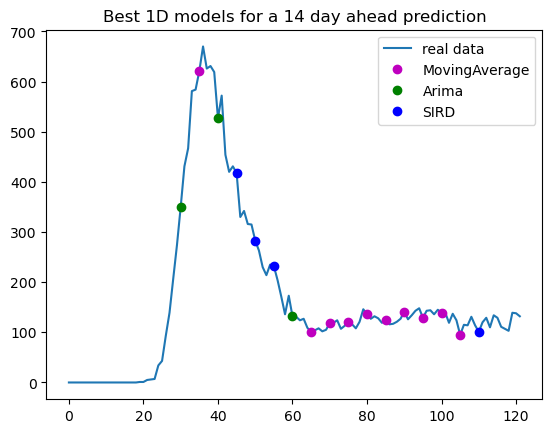

aaaaaaaaaaaa
MovingAverage
Arima
SIRD


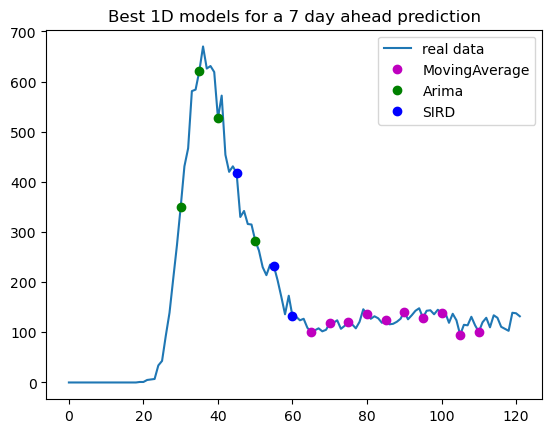

aaaaaaaaaaaa
Arima
SIRD


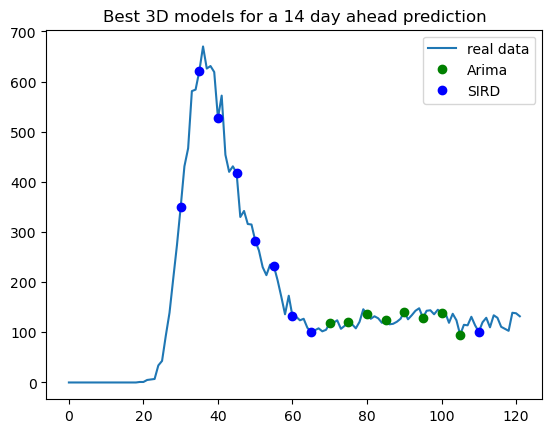

aaaaaaaaaaaa
ExponentialRegression
SIRD
Arima


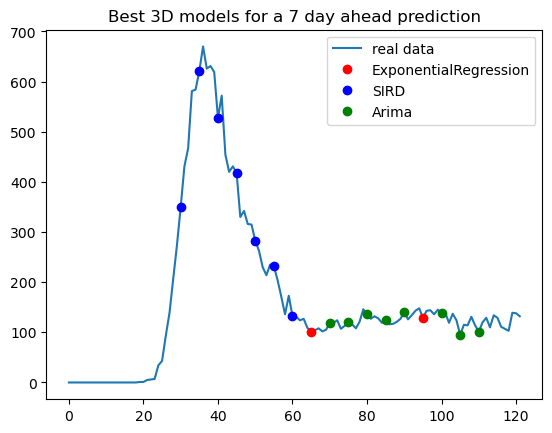

In [117]:
def plot_best_models(best_models, indexs_points, title):
    plt.plot(new_deaths, label='real data')
    for i in range (len(list(set(best_models)))): 
        model = list(set(best_models))[i]
        print(model)
        colour=coloursdico[model]
        list_of_points=[]
        for j in range(len(best_models)): 
            if best_models[j]==model: 
                list_of_points.append(indexs_points[j])
        plt.plot(list_of_points, new_deaths[list_of_points], colour, label=model)
    plt.legend()
    plt.title(title)
    plt.show()
print('aaaaaaaaaaaa')
plot_best_models(best_models_1D_14, indexs_points, 'Best 1D models for a 14 day ahead prediction')
print('aaaaaaaaaaaa')

plot_best_models(best_models_1D_7, indexs_points, 'Best 1D models for a 7 day ahead prediction')
print('aaaaaaaaaaaa')

plot_best_models(best_models_3D_14, indexs_points, 'Best 3D models for a 14 day ahead prediction')
print('aaaaaaaaaaaa')

plot_best_models(best_models_3D_7, indexs_points, 'Best 3D models for a 7 day ahead prediction')
    